In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [17]:
#interquartile range(IQR) = Q3(=75%)-Q1(=25%)
# 1,4,4,4,3,6,3,6,3,
# to find IQR 
# step 1 -convert in sorting
l=[1,4,4,4,3,6,3,6,3]
l.sort()
# step2 - to find median and break it to half part
n=len(l)
print(l)
median=l[n//2] if n%2!=0 else (l[n//2]+l[n//2+1])//2
print(median)
l1=l[:l.index(median)]
l2=l[l.index(median)+1:]
n1,n2=len(l1),len(l2)
print(l1,l2)
# step3 - to find median for both part
med1=l1[n1//2] if n1%2!=0 else (l1[n1//2]+l1[n1//2+1])//2
med2=l2[n2//2] if n2%2!=0 else (l2[n2//2-1]+l2[n2//2])//2
print(med1,med2)#Q3=med2,Q1=med1
Q3=med2
Q1=med1
IQR=Q3-Q1
print(IQR)

[1, 3, 3, 3, 4, 4, 4, 6, 6]
4
[1, 3, 3, 3] [4, 4, 6, 6]
3 5
2


In [ ]:
# to find outlet 
# we use formule UPPERLIMIT=(Q3+1.5)*IQR
# we use formule LOWERLIMIT=(Q1-1.5)*IQR

METHOD TO FIND OUTLIERS USING MEAN

In [21]:
df=pd.read_csv("placement.csv.xls")
print(df)

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]


<Figure size 1600x500 with 0 Axes>

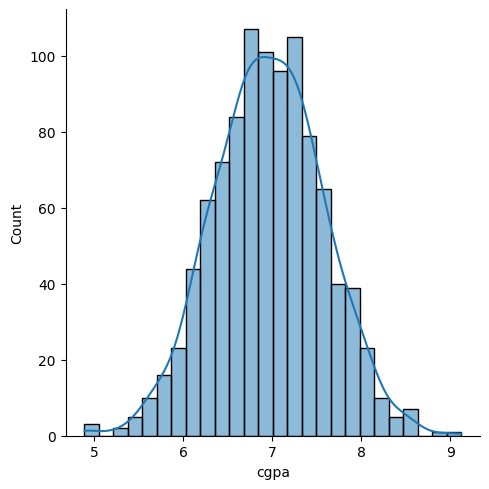

In [24]:
plt.figure(figsize=(16,5))
sns.displot(df['cgpa'],kde=True)
plt.show()

In [30]:
mean=df['cgpa'].mean()
print(mean)
df.describe()
df.describe()

6.96124


,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [32]:
#capping
#finding HIGHEST LIMIT AND LOWER LIMIT
HL=df['cgpa'].mean() + 3*df['cgpa'].std()
LL=df['cgpa'].mean() - 3*df['cgpa'].std()
print(HL)
print(LL)

8.808933625397168
5.113546374602832


In [35]:
#FINDING OUTLIERS
print(df[(df['cgpa']>HL) | (df['cgpa']<LL)])

     cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1


In [36]:
#TRIMMING
newdf=df[(df['cgpa']<HL) & (df['cgpa']>LL)]
print(newdf)

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]
